In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv


In [2]:
heart=pd.read_csv('../input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv')

In [3]:
heart.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [4]:
heart.shape

(4238, 16)

In [5]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [6]:
heart.min()

male                 0.00
age                 32.00
education            1.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            107.00
sysBP               83.50
diaBP               48.00
BMI                 15.54
heartRate           44.00
glucose             40.00
TenYearCHD           0.00
dtype: float64

In [7]:
heart.max()

male                 1.0
age                 70.0
education            4.0
currentSmoker        1.0
cigsPerDay          70.0
BPMeds               1.0
prevalentStroke      1.0
prevalentHyp         1.0
diabetes             1.0
totChol            696.0
sysBP              295.0
diaBP              142.5
BMI                 56.8
heartRate          143.0
glucose            394.0
TenYearCHD           1.0
dtype: float64

In [8]:
heart.age.value_counts()

40    191
46    182
42    180
41    174
48    173
39    169
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
61    110
63    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
68     18
34     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64

In [9]:
heart.male.value_counts()

0    2419
1    1819
Name: male, dtype: int64

In [10]:
heart.BMI.value_counts()

23.48    18
22.54    18
22.91    18
22.19    18
23.09    16
         ..
36.07     1
22.08     1
38.39     1
31.13     1
19.00     1
Name: BMI, Length: 1363, dtype: int64

In [11]:
heart.currentSmoker.value_counts()

0    2144
1    2094
Name: currentSmoker, dtype: int64

In [12]:
heart.cigsPerDay.value_counts()

0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
6.0       18
2.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
16.0       3
13.0       3
12.0       3
14.0       2
19.0       2
70.0       1
38.0       1
29.0       1
Name: cigsPerDay, dtype: int64

In [13]:
heart.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [14]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [15]:
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [16]:
#education does not play iportant role in heart attack thats why we remove the eduction column
heart=heart.drop('education',axis=1)
#we all see the cigsperday and currentsmoker cohernt with each other thats why we remove cigs per day columns
heart=heart.drop('cigsPerDay',axis=1)

In [17]:
#remove null values from the data sets
heart.dropna(axis=0,inplace=True)

In [18]:
heart.isnull().sum()

male               0
age                0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [19]:
heart.shape

(3774, 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe205e1a710>,
      dtype=object)

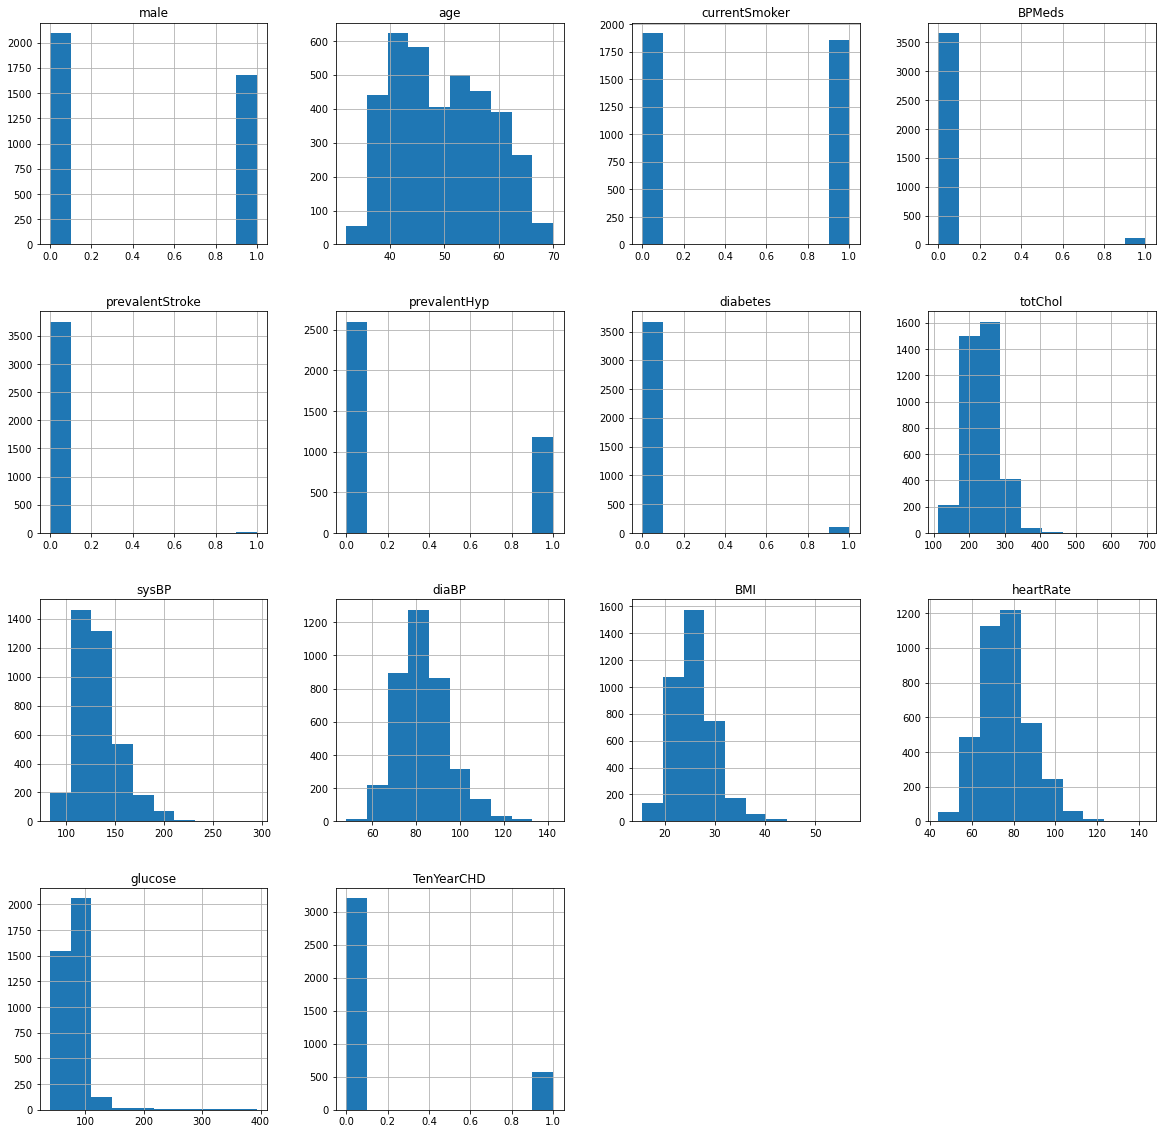

In [20]:
#input nan values acourding to there distrbutions
heart.hist(figsize=(20,20))

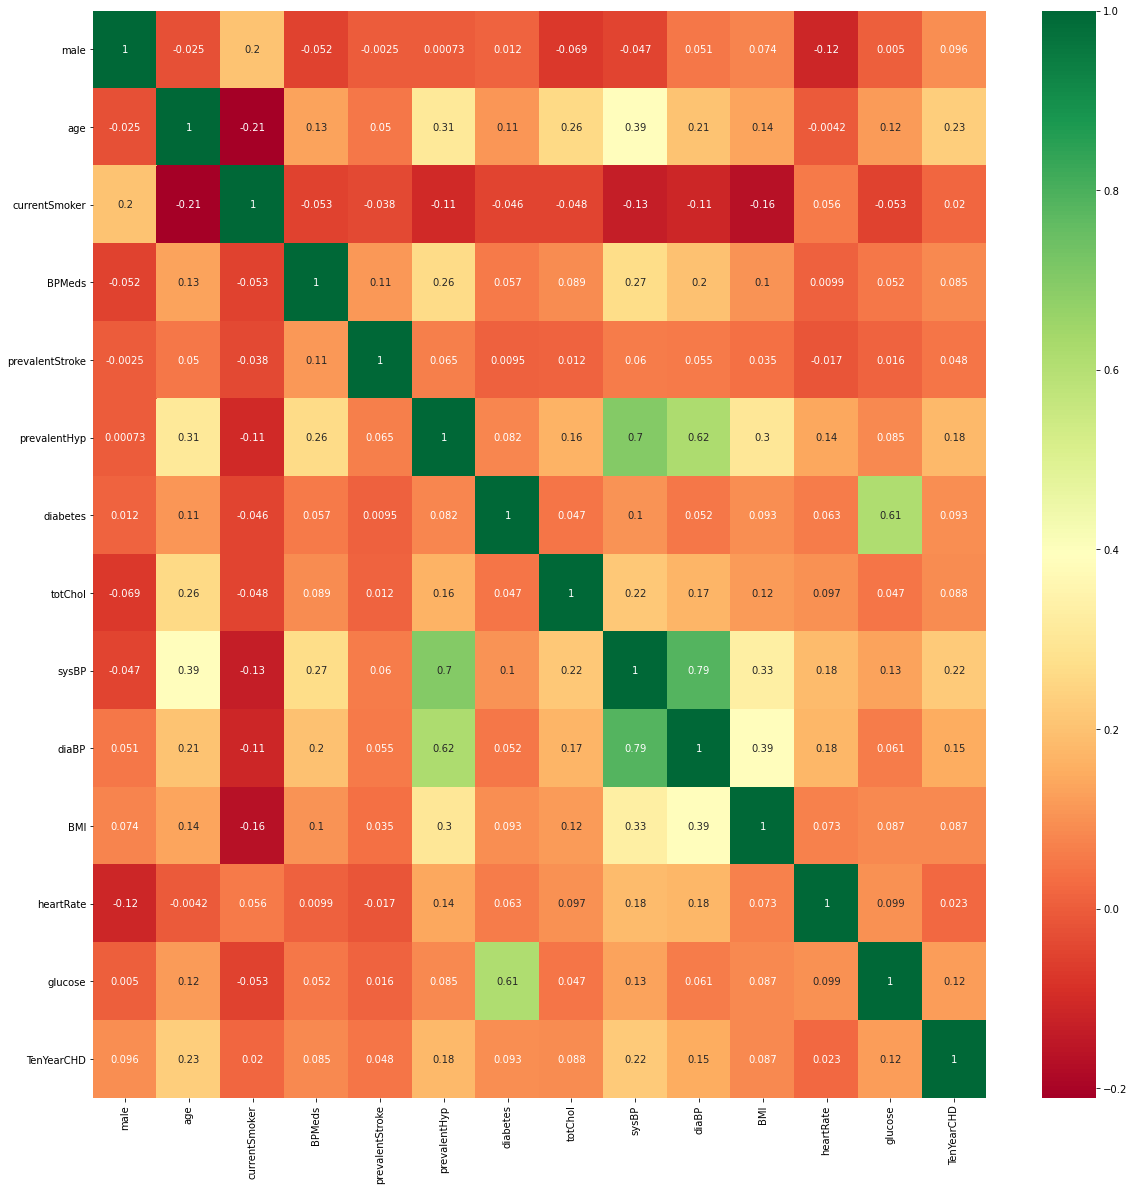

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(heart.corr(),annot=True,cmap='RdYlGn')

In [23]:
#feature selection of the data sets
x=heart.iloc[:,0:13].values
y=heart.iloc[:,-1].values

# model selection and preprocessing of the data sets

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=25)

In [25]:
print(len(X_train))
print(len(X_test))

3749
25


In [26]:
#here we apply logistic regression 
from sklearn.linear_model import LogisticRegression
lgt = LogisticRegression()
fit=lgt.fit(X_train,y_train)
fit

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [27]:
trainscore=lgt.score(X_train,y_train)
trainscore

0.8484929314483862

In [28]:
testscore=lgt.score(X_test,y_test)
testscore

0.88

In [29]:
lgtpredict=lgt.predict(X_test)
lgtpredict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [33]:
pd.crosstab(y_test,lgtpredict)

col_0,0
row_0,
0,22
1,3


Text(0.5, 15.0, 'predicted label')

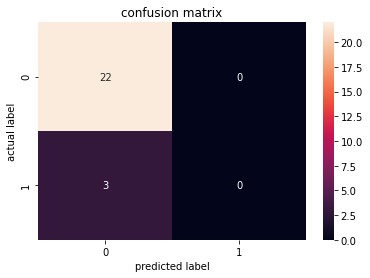

In [39]:
from sklearn import metrics
cf=metrics.confusion_matrix(y_test,lgtpredict)
sns.heatmap(pd.DataFrame(cf),annot=True,fmt='g')
plt.title('confusion matrix')
plt.ylabel('actual label')
plt.xlabel('predicted label')

In [44]:
print(metrics.accuracy_score(y_test,lgtpredict))

0.88


In [41]:
print(metrics.classification_report(y_test,lgtpredict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       0.00      0.00      0.00         3

    accuracy                           0.88        25
   macro avg       0.44      0.50      0.47        25
weighted avg       0.77      0.88      0.82        25



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
metrics.roc_auc_score(y_test,lgtpredict,average='weighted')

0.5

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


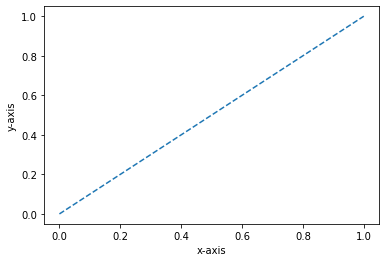

In [58]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,lgtpredict,pos_label=2)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr,label='logistic curve')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()